# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from time import time
from torchvision import datasets

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
class MNIST_Transform(object):
    def __call__(self, data):
        data = transforms.ToTensor()(data)
        data = transforms.Normalize((0.5,), (0.5,))(data)

        return data

transform = transforms.Compose([
    MNIST_Transform()
])

root='data'
# Create training set and define training dataloader
train_set = datasets.MNIST(root=root, download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_set = datasets.MNIST(root=root, download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I first chose transforms.ToTensor() because this transform translate the images from the MNIST dataset into PyTorch sensors. The original MNIST images are PIL images. PyTorch sensors are valuable in PyTorch because they allow for fast computation and differentation during the training phase.

Then I chose transforms.Normalize((0.5.),(0.5,)) in order to normalize the pixel values that the images contain. The images in the MNIST dataset have pixel values in the range of 0 to 255. After normalizing them , the pixel values are scaled and range from [-1,1]. This process causes the model to converge more quickly during the training phase, which increases algorithmic efficiency.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
# Explore the dataset info
def dataset_info(data, name):
    print(f"{name} set:")
    print("Number of samples:", len(data))
    print(f"Number of batches {name}_loader): {len(data)}")
    print("Data shape (single sample):", data[0][0].shape)
    print("Label of the first sample:", data[0][1])
    print("\n")

In [5]:
dataset_info(train_set, "train")
dataset_info(test_set, "test")

train set:
Number of samples: 60000
Number of batches train_loader): 60000
Data shape (single sample): torch.Size([1, 28, 28])
Label of the first sample: 5


test set:
Number of samples: 10000
Number of batches test_loader): 10000
Data shape (single sample): torch.Size([1, 28, 28])
Label of the first sample: 7




In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


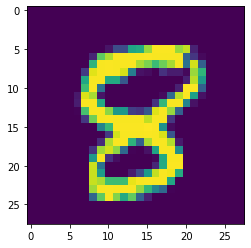

6


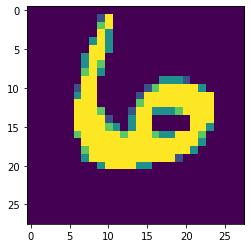

6


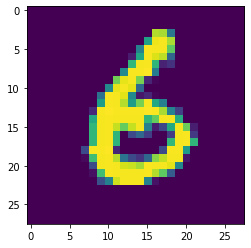

3


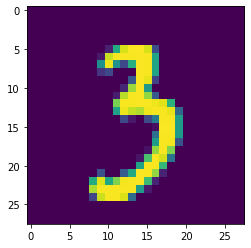

3


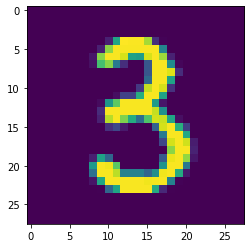

In [7]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
class MNIST_Neural_Network(nn.Module):
    def __init__(self):
        super(MNIST_Neural_Network, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
model = MNIST_Neural_Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Cross-entropy loss is a loss function that measures the difference between the predicted probability distribution and the ground truth distribution. It is commonly used for classification problems, where the goal is to predict the class label of an input, which is what we want to do for this MNIST Digits Classifier project. CrossEntropyLoss utilizes softmax activation and the negative log-likelihood loss.

Softmax activation is a function that is applied to the output of a neural network layer to convert it into a probability distribution. The softmax function ensures that the output of the layer sums to 1, so that the output represents a valid probability distribution.

Negative log-likelihood loss is a loss function that measures the negative log-likelihood of the ground truth distribution. The negative log-likelihood is a measure of how likely the ground truth distribution is, given the predicted probability distribution.

Stochastic gradient descent (SGD) was chosen because it is a commonly used optimization algorithm for training neural networks. SGD updates the model parameters in the direction of the negative gradient of the loss function. The gradient is a measure of how much the loss function changes as a function of the model parameters. The learning rate is a hyperparameter that controls how much the model parameters are updated in each iteration.

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MNIST_Neural_Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [11]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10, print_at=245):
    model.train()
    model.to(device)

    loss_values = []

    for epoch in range(num_epochs):
        running_loss = 0.0

        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            # backward pass
            loss.backward()
            # optimization
            optimizer.step()
            # record the loss
            running_loss += loss.item()
            # print the loss every print_at (245) batches
            if batch_idx % print_at == print_at - 1:
                avg_loss = running_loss / print_at
                print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {avg_loss:.4f}")
                running_loss = 0.0
        # Calculate the average loss for the epoch
        avg_epoch_loss = running_loss / len(train_loader)
        loss_values.append(avg_epoch_loss)

    print("Training complete!")
    return loss_values

loss_values = train_model(model, train_loader, criterion, optimizer, num_epochs=7)

Epoch [1/7], Batch [245/938], Loss: 1.9156
Epoch [1/7], Batch [490/938], Loss: 0.9365
Epoch [1/7], Batch [735/938], Loss: 0.5813
Epoch [2/7], Batch [245/938], Loss: 0.4172
Epoch [2/7], Batch [490/938], Loss: 0.3778
Epoch [2/7], Batch [735/938], Loss: 0.3733
Epoch [3/7], Batch [245/938], Loss: 0.3457
Epoch [3/7], Batch [490/938], Loss: 0.3330
Epoch [3/7], Batch [735/938], Loss: 0.3129
Epoch [4/7], Batch [245/938], Loss: 0.3054
Epoch [4/7], Batch [490/938], Loss: 0.2962
Epoch [4/7], Batch [735/938], Loss: 0.2898
Epoch [5/7], Batch [245/938], Loss: 0.2786
Epoch [5/7], Batch [490/938], Loss: 0.2757
Epoch [5/7], Batch [735/938], Loss: 0.2653
Epoch [6/7], Batch [245/938], Loss: 0.2607
Epoch [6/7], Batch [490/938], Loss: 0.2428
Epoch [6/7], Batch [735/938], Loss: 0.2549
Epoch [7/7], Batch [245/938], Loss: 0.2335
Epoch [7/7], Batch [490/938], Loss: 0.2324
Epoch [7/7], Batch [735/938], Loss: 0.2279
Training complete!


Plot the training loss (and validation loss/accuracy, if recorded).

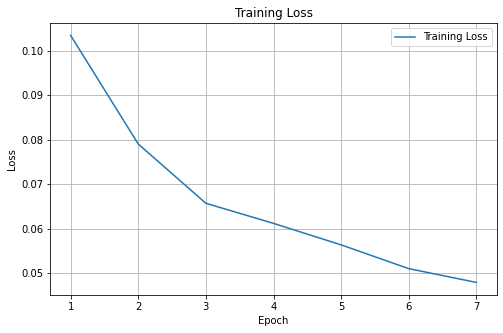

In [12]:
def plot_loss(loss_values):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(loss_values)+1), loss_values, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(loss_values)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [13]:
def test_model(model, test_loader):
    model.eval()  # set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # disable gradient tracking for evaluation
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # calculate test accuracy
    test_accuracy = 100 * correct / total

    return test_accuracy

print(f"Test Accuracy: {test_model(model, test_loader):.2f}%")

Test Accuracy: 93.46%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Epoch [1/15], Batch [245/938], Loss: 0.2698
Epoch [1/15], Batch [490/938], Loss: 0.2241
Epoch [1/15], Batch [735/938], Loss: 0.1927
Epoch [2/15], Batch [245/938], Loss: 0.1523
Epoch [2/15], Batch [490/938], Loss: 0.1342
Epoch [2/15], Batch [735/938], Loss: 0.1439
Epoch [3/15], Batch [245/938], Loss: 0.1130
Epoch [3/15], Batch [490/938], Loss: 0.1042
Epoch [3/15], Batch [735/938], Loss: 0.1141
Epoch [4/15], Batch [245/938], Loss: 0.0877
Epoch [4/15], Batch [490/938], Loss: 0.0911
Epoch [4/15], Batch [735/938], Loss: 0.0894
Epoch [5/15], Batch [245/938], Loss: 0.0672
Epoch [5/15], Batch [490/938], Loss: 0.0807
Epoch [5/15], Batch [735/938], Loss: 0.0792
Epoch [6/15], Batch [245/938], Loss: 0.0742
Epoch [6/15], Batch [490/938], Loss: 0.0696
Epoch [6/15], Batch [735/938], Loss: 0.0766
Epoch [7/15], Batch [245/938], Loss: 0.0604
Epoch [7/15], Batch [490/938], Loss: 0.0634
Epoch [7/15], Batch [735/938], Loss: 0.0659
Epoch [8/15], Batch [245/938], Loss: 0.0542
Epoch [8/15], Batch [490/938], L

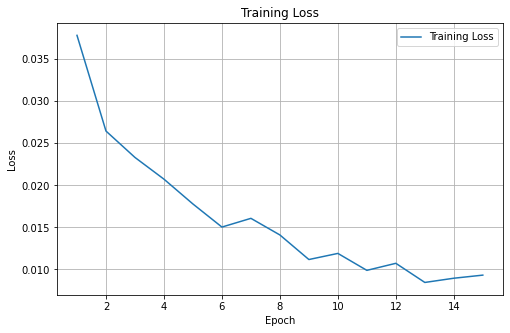

Test Accuracy: 97.35%


In [14]:
num_epochs = 15 # run more epochs
# try the Adam optimizer. This method is an adaptive learning rate optimization algorithm.
# Adam can coverge faster than regular SGD.
# better learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001) 
loss_values = train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs)
plot_loss(loss_values)
print(f"Test Accuracy: {test_model(model, test_loader):.2f}%")

## Saving your model
Using `torch.save`, save your model for future loading.

In [15]:
torch.save(model.state_dict(), 'model_state.pt')
print("Improved model has been saved!")

Improved model has been saved!
